In [130]:
# importowanie bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from dython.nominal import associations

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler    
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
sns.set()
from sklearn.model_selection import cross_val_predict
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

import tensorflow
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import initializers
from keras import regularizers
from keras import constraints
from tensorflow.keras.optimizers import SGD

In [131]:
dane = pd.read_csv('train.csv',low_memory=False)
dane

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [132]:
def analze(dane): 
    
    # Wstępna analiza danych
    
        print(dane.shape)
        print('\n**********************************\n')
        print(dane.info())
        print('\n**********************************\n')
        print(dane.isnull().sum())
        print('\n**********************************\n')
        print(dane.describe().transpose())
        print('\n**********************************\n')
        

analze(dane)

(100000, 28)

**********************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 


# Preprocessing

ID, Name oraz SSN - nieprzydatne

Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt Credit_Mix, Monthly_Balance Numerical - należy poprawić

Occupation, CreditMix ma wartość "__"

Num_Bank_Accounts zawiera wartości ujemne

Dużo brakujących danych

In [133]:
dane = dane.drop('ID', axis=1)
dane = dane.drop('Customer_ID', axis=1)
dane = dane.drop('Name', axis=1)
dane = dane.drop('SSN', axis=1)

In [134]:
dane.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [135]:
def fill_null_values(dane):
    data_copy = dane.copy()
    
    # identyfikujemy kolumny z wartościami null
    null_cols = data_copy.columns[data_copy.isna().any()]
    
    for col in null_cols:
        # Sprawdzamy czy kolumna jest kategoryczna czy numeryczna
        if data_copy[col].dtype in ['int64', 'float64']:
            # null values zamieniamy na mediane
            data_copy[col].fillna(data_copy[col].median(), inplace=True)
        else:
            # null values zamieniamy na najpopularniejszy wyraz
            data_copy[col].fillna(data_copy[col].mode()[0], inplace=True)
    
    return data_copy

dane = fill_null_values(dane)

In [136]:
# Błędy strukturalne
# Nieprawidłowe dane w kolumnie poprawnymi wartościami
dane = dane.applymap(lambda x: x if x is np.NaN or not \
        isinstance(x, str) else str(x).strip('_')).replace(['','nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
# Credit History Age ma lata i miesiące połączone jako wartość np. "22 years and 1 month". 
# Będziemy brać tylko lata
def take_years(x):  
    if x is not None:
        return str(x).strip()[0:2]

dane.Credit_History_Age = dane.Credit_History_Age.apply(take_years)
dane['Credit_History_Age'] = dane['Credit_History_Age'].replace({'na': np.NaN})

In [137]:
# Zmieniamy typ danych
for i in dane.columns:
    try:
        dane[i] = dane[i].astype(float)
    except:
        continue

In [138]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [139]:
def tabela(dane):
    tabela = []
    columns = dane.columns
    for col in columns:
        dtype = dane[col].dtypes
        nunique = dane[col].nunique()
        null = dane[col].isnull().sum()
        duplicates = dane[col].duplicated().sum()
        tabela.append([col,dtype,nunique,null,duplicates])
    tabela_dane = pd.DataFrame(tabela)
    tabela_dane.columns = ['column','dtype','nunique','null','duplicates']
    return tabela_dane

tabela(dane)

,column,dtype,nunique,null,duplicates
0,Month,object,8,0,99992
1,Age,float64,1728,0,98272
2,Occupation,object,15,7062,99984
3,Annual_Income,float64,13487,0,86513
4,Monthly_Inhand_Salary,float64,13235,0,86765
5,Num_Bank_Accounts,float64,943,0,99057
6,Num_Credit_Card,float64,1179,0,98821
7,Interest_Rate,float64,1750,0,98250
8,Num_of_Loan,float64,414,0,99586
9,Type_of_Loan,object,6260,0,93740


In [140]:
def usuwanie_odstajacych_danych(dane):
    data_copy = dane.copy()
    # Kolumny liczbowe
    num_cols = data_copy.select_dtypes(include=['float64', 'int64']).columns
    
    # Liczymy liczbę wartości odstających przed ich usunięciem
    num_outliers = 0
    for col in num_cols:
        q1 = data_copy[col].quantile(0.25)
        q3 = data_copy[col].quantile(0.75)
        x = q3 - q1
        lower_bound = q1 - (1.5 * x)
        upper_bound = q3 + (1.5 * x)
        num_outliers += len(data_copy[(data_copy[col] < lower_bound) | (data_copy[col] > upper_bound)])
    print("Liczba odstających obserwacji przed usuwaniem: ", num_outliers)
    
    for col in num_cols:
        # Calculate lower and upper bounds using the interquartile range (IQR) method
        q1 = data_copy[col].quantile(0.25)
        q3 = data_copy[col].quantile(0.75)
        x = q3 - q1
        lower_bound = q1 - (1.5 * x)
        upper_bound = q3 + (1.5 * x)
        
        # Usuń obserwacje poza granicami
        data_copy = data_copy[(data_copy[col] >= lower_bound) & (data_copy[col] <= upper_bound)]
    
    # Liczymy liczbę wartości odstających po ich usunięciu
    num_outliers = 0
    for col in num_cols:
        q1 = data_copy[col].quantile(0.25)
        q3 = data_copy[col].quantile(0.75)
        x = q3 - q1
        lower_bound = q1 - (1.5 * x)
        upper_bound = q3 + (1.5 * x)
        num_outliers += len(data_copy[(data_copy[col] < lower_bound) | (data_copy[col] > upper_bound)])
    print("Liczba odstających obserwacji po usuwaniu: ", num_outliers)
    
    return data_copy

dane = usuwanie_odstajacych_danych(dane)

Liczba odstających obserwacji przed usuwaniem:  60680
Liczba odstających obserwacji po usuwaniu:  14656


In [141]:
def usuwanie_odstajacych_danych(dane):
    data_copy = dane.copy()
    
    # Kolumna wieku
    age_col = data_copy['Age']
    
    # Usuń obserwacje z wiekiem mniejszym niż 0 lub większym niż 100
    data_copy = data_copy[(age_col >= 0) & (age_col <= 100)]
    
    return data_copy

dane = usuwanie_odstajacych_danych(dane)

In [142]:
def fill_null_values(dane):

    data_copy = dane.copy()
    
    # Pobierz kolumny kategoryczne
    cat_cols = data_copy.select_dtypes(include=['object']).columns
    
    for col in cat_cols:
        # Najczęstsza wartość
        most_frequent = data_copy[col].mode()[0]
        
        # Zamień wartości „NaN” na najczęstszą wartość
        data_copy[col].fillna(most_frequent, inplace=True)
    
    return data_copy

dane = fill_null_values(dane)

In [143]:
tabela(dane)

,column,dtype,nunique,null,duplicates
0,Month,object,8,0,54063
1,Age,float64,43,0,54028
2,Occupation,object,15,0,54056
3,Annual_Income,float64,10190,0,43881
4,Monthly_Inhand_Salary,float64,10405,0,43666
5,Num_Bank_Accounts,float64,13,0,54058
6,Num_Credit_Card,float64,12,0,54059
7,Interest_Rate,float64,34,0,54037
8,Num_of_Loan,float64,10,0,54061
9,Type_of_Loan,object,4955,0,49116


In [144]:
Credit_Score = dane['Credit_Score']

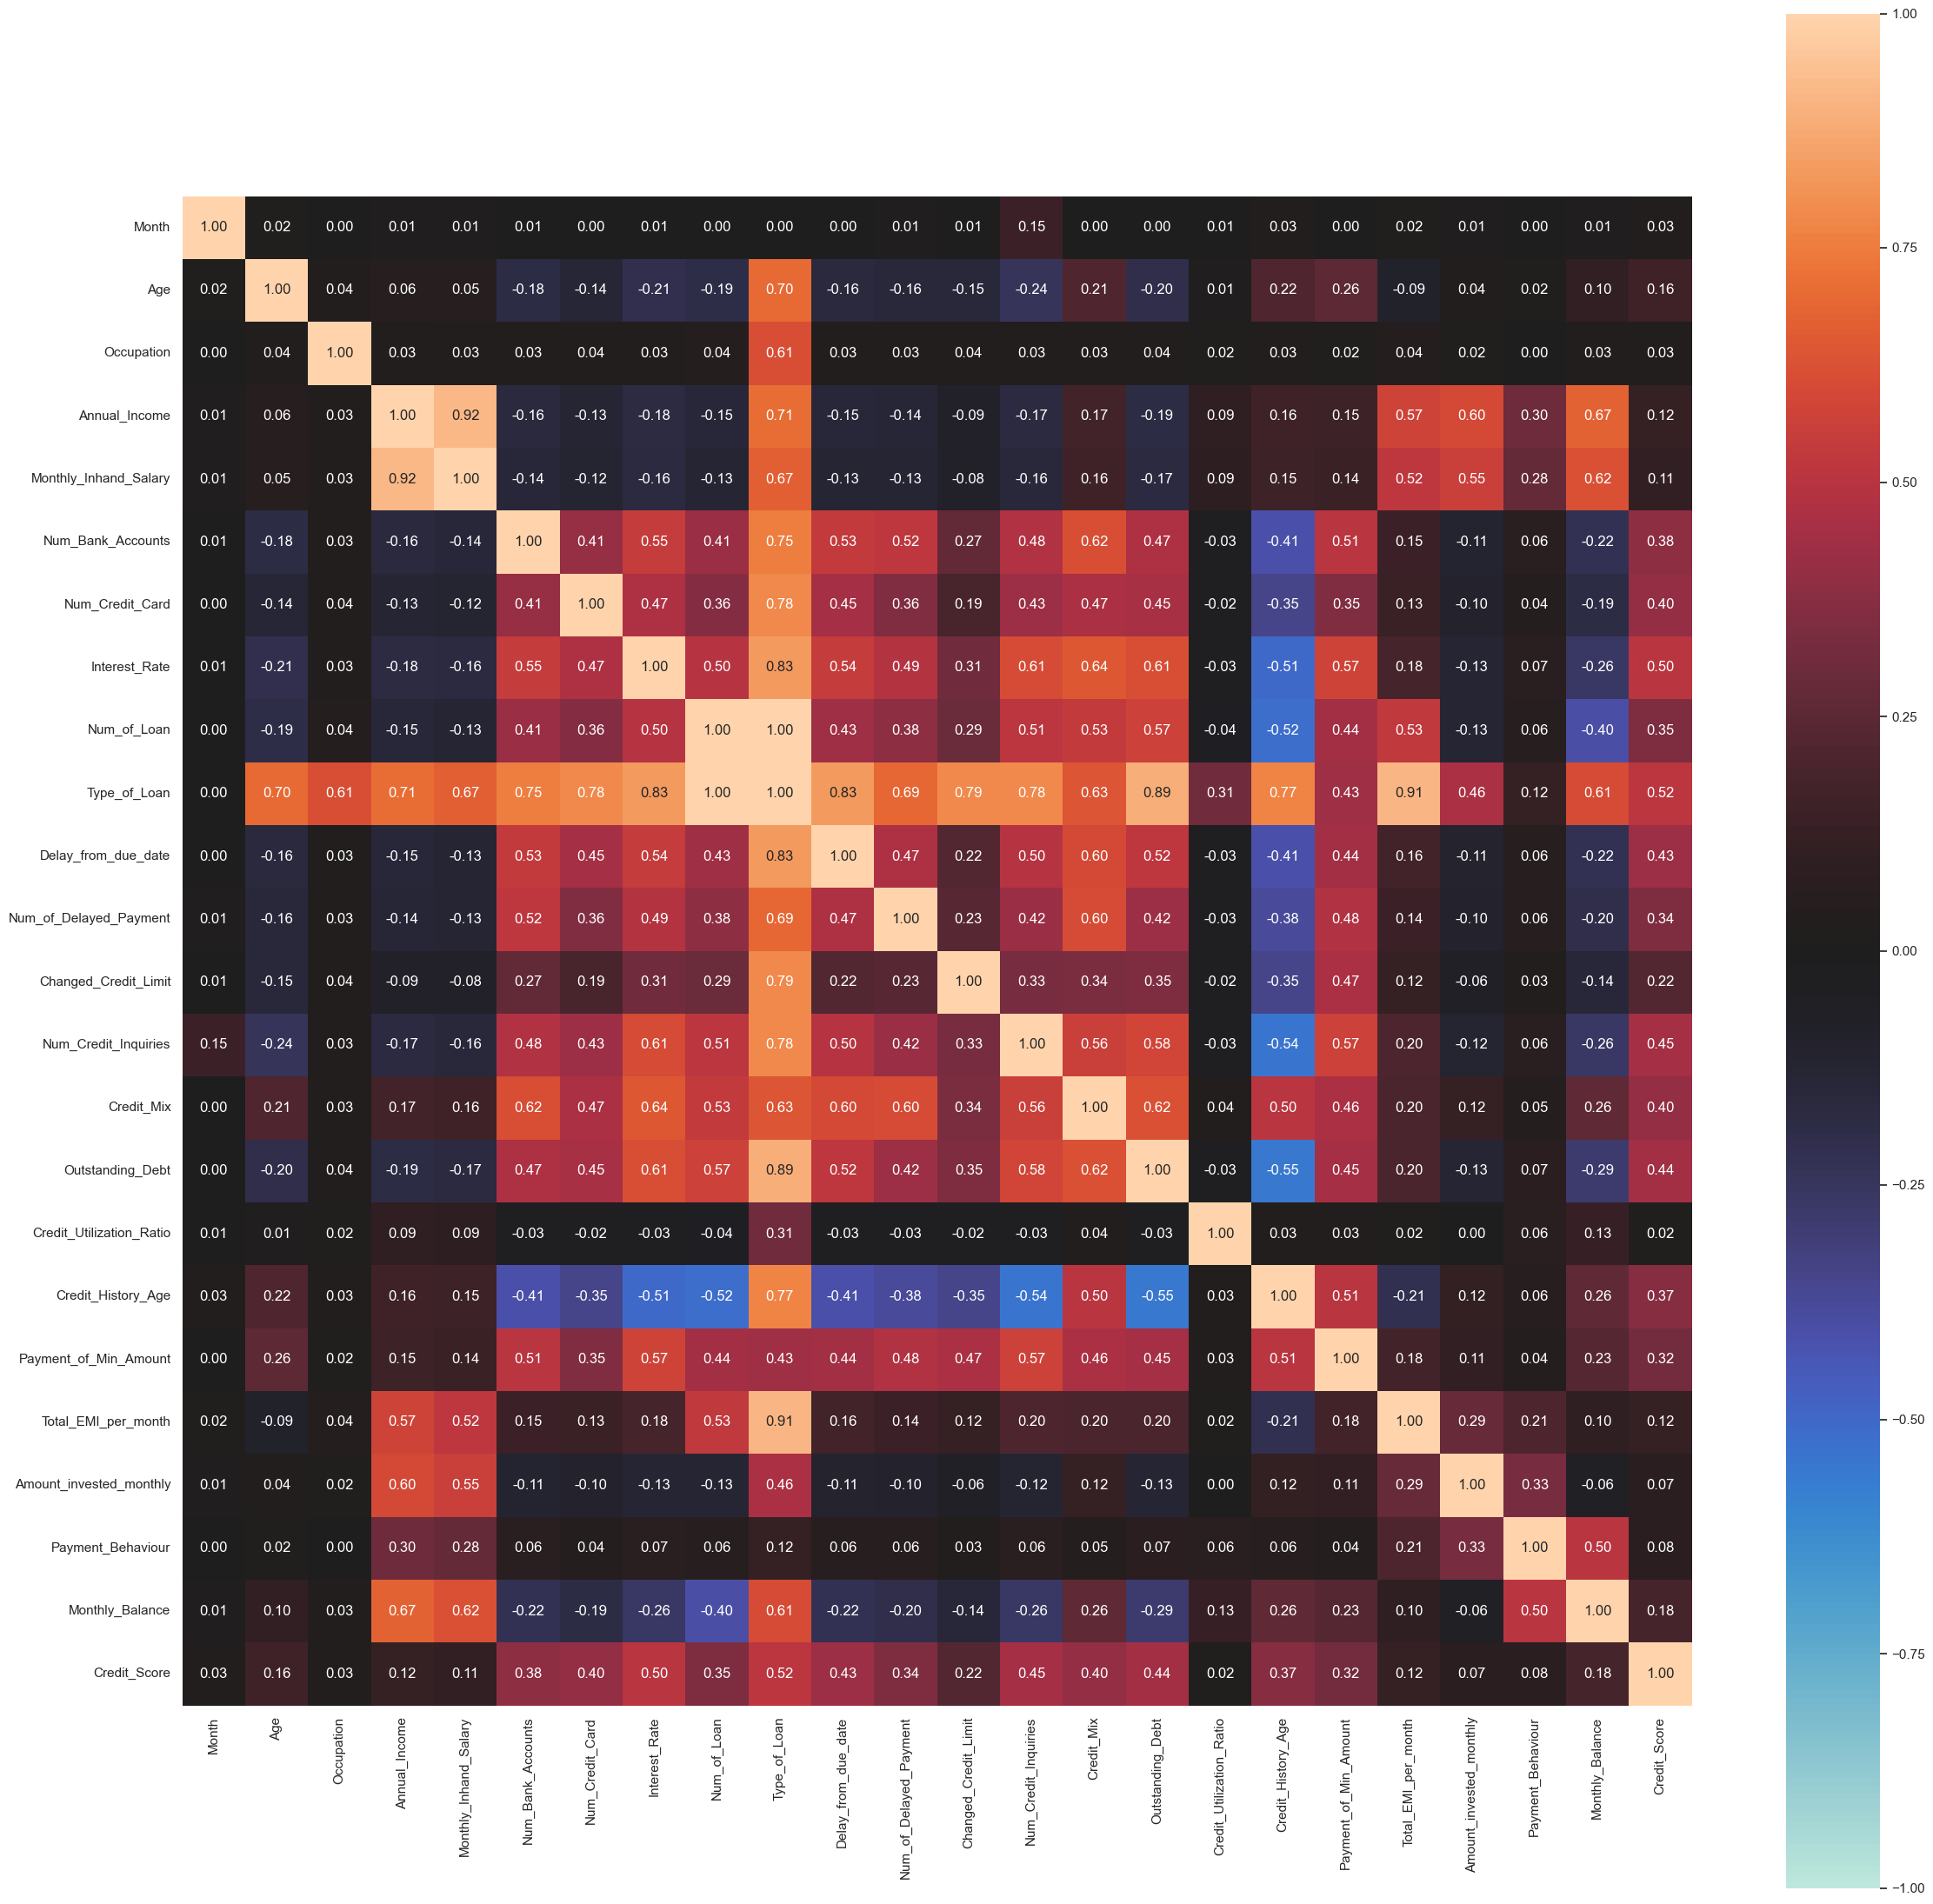

In [145]:
fig,ax = plt.subplots(figsize = (28,28))
associations(dane,nominal_columns=['Month','Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount',
                                   'Payment_Behaviour','Credit_Score'],ax=ax)


fig.savefig(('Korelacja'+ '.jpg'), dpi=300 )

In [146]:
dane.index = range(0,54071)
dane.index

RangeIndex(start=0, stop=54071, step=1)

In [147]:
dane = dane.drop('Month', axis=1)
dane = dane.drop('Age', axis=1)
dane = dane.drop('Occupation', axis=1)
dane = dane.drop('Annual_Income', axis=1)
dane = dane.drop('Monthly_Inhand_Salary', axis=1)
dane = dane.drop('Num_of_Delayed_Payment', axis=1)
dane = dane.drop('Changed_Credit_Limit', axis=1)
dane = dane.drop('Credit_Utilization_Ratio', axis=1)
dane = dane.drop('Total_EMI_per_month', axis=1)
dane = dane.drop('Amount_invested_monthly', axis=1)
dane = dane.drop('Payment_Behaviour', axis=1)
dane = dane.drop('Monthly_Balance', axis=1)

In [148]:
pd.options.mode.chained_assignment = None 
for i in range(len(dane['Credit_Score'])):
    if  dane['Credit_Score'][i] == 'Good':
        dane['Credit_Score'][i] = 2
    elif  dane['Credit_Score'][i] == 'Standard':
        dane['Credit_Score'][i] = 1
    else:
        dane['Credit_Score'][i] = 0
        

dane['Credit_Score'] = dane['Credit_Score'].astype(int)
Credit_Score_num= dane['Credit_Score']

In [149]:
for i in range(len(dane['Credit_Mix'])):
    if  dane['Credit_Mix'][i] == 'Good':
        dane['Credit_Mix'][i] = 2
    elif  dane['Credit_Mix'][i] == 'Standard':
        dane['Credit_Mix'][i] = 1
    else:
        dane['Credit_Mix'][i] = 0
        
dane['Credit_Mix'] = dane['Credit_Mix'].astype(float)

In [150]:
lista = ['Yes','No']
for i in range(len(dane['Payment_of_Min_Amount'])):
    if dane['Payment_of_Min_Amount'][i] == 'NM':
        dane['Payment_of_Min_Amount'][i] = random.choice(lista)

In [151]:
for i in range(len(dane['Payment_of_Min_Amount'])):
    if dane['Payment_of_Min_Amount'][i] == 'Yes':
        dane['Payment_of_Min_Amount'][i] = 1
    else:
        dane['Payment_of_Min_Amount'][i] = 0
        
dane['Payment_of_Min_Amount'] = dane['Payment_of_Min_Amount'].astype(int)

In [152]:
dane.head()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Credit_Score
0,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,1.0,809.98,22.0,0,2
1,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,4.0,2.0,809.98,15.0,0,2
2,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,2.0,809.98,22.0,0,2
3,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,2.0,809.98,22.0,0,2
4,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,2.0,809.98,22.0,0,2


In [153]:
### Creating 8 different lists for each loan type

auto_loan = [0] * (len(dane))
credit_builder_loan = [0] * (len(dane))
personal_loan = [0] * (len(dane))
home_equity_loan = [0] * (len(dane))
mortgage_loan = [0] * (len(dane))
student_loan = [0] * (len(dane))
debt_consolidation_loan = [0] * (len(dane))
payday_loan = [0] * (len(dane))

In [154]:
### Using 0's and 1's if a customer has a particular loan

for index in range(len(dane['Type_of_Loan'])):
    ### For Auto Loan
    if 'Auto' in dane['Type_of_Loan'][index]:
        auto_loan[index] = 1
    
    ### For Credit Builder Loan
    if 'Credit-Builder' in dane['Type_of_Loan'][index]:
        credit_builder_loan[index] = 1
        
    ### For Personal Loan
    if 'Personal' in dane['Type_of_Loan'][index]:
        personal_loan[index] = 1
    
    ### For Home Equity Loan
    if 'Home' in dane['Type_of_Loan'][index]:
        home_equity_loan[index] = 1
    
    ### For Mortgage Loan
    if 'Mortgage' in dane['Type_of_Loan'][index]:
        mortgage_loan[index] = 1
    
    ### For Student Loan
    if 'Student' in dane['Type_of_Loan'][index]:
        student_loan[index] = 1
        
    ### For Debt Consolidation loan
    if 'Debt' in dane['Type_of_Loan'][index]:
        debt_consolidation_loan[index] = 1
    
    ### For Payday loan
    if 'Payday' in dane['Type_of_Loan'][index]:
        payday_loan[index] = 1

In [155]:
### Adding the new columns to the dataset
dane['Auto_Loan'] = auto_loan
dane['Credit_Builder_Loan'] = credit_builder_loan
dane['Personal_Loan'] = personal_loan
dane['Home_Enquity_Loan'] = home_equity_loan
dane['Mortgage_Loan'] = mortgage_loan
dane['Student_Loan'] = student_loan
dane['Debt_Consolidation_Loan'] = debt_consolidation_loan
dane['Payday_Loan'] = payday_loan

In [156]:
dane.head()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Credit_Score,Auto_Loan,Credit_Builder_Loan,Personal_Loan,Home_Enquity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan
0,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,1.0,809.98,22.0,0,2,1,1,1,1,0,0,0,0
1,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,4.0,2.0,809.98,15.0,0,2,1,1,1,1,0,0,0,0
2,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,2.0,809.98,22.0,0,2,1,1,1,1,0,0,0,0
3,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,2.0,809.98,22.0,0,2,1,1,1,1,0,0,0,0
4,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,2.0,809.98,22.0,0,2,1,1,1,1,0,0,0,0


In [157]:
### Removing the column - Type_of_loan

dane = dane.drop(['Type_of_Loan'], axis = 1)
dane = dane.drop(['Credit_Score'], axis = 1)

In [158]:
dane['Credit_Score'] = Credit_Score_num

In [159]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54071 entries, 0 to 54070
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Num_Bank_Accounts        54071 non-null  float64
 1   Num_Credit_Card          54071 non-null  float64
 2   Interest_Rate            54071 non-null  float64
 3   Num_of_Loan              54071 non-null  float64
 4   Delay_from_due_date      54071 non-null  float64
 5   Num_Credit_Inquiries     54071 non-null  float64
 6   Credit_Mix               54071 non-null  float64
 7   Outstanding_Debt         54071 non-null  float64
 8   Credit_History_Age       54071 non-null  float64
 9   Payment_of_Min_Amount    54071 non-null  int32  
 10  Auto_Loan                54071 non-null  int64  
 11  Credit_Builder_Loan      54071 non-null  int64  
 12  Personal_Loan            54071 non-null  int64  
 13  Home_Enquity_Loan        54071 non-null  int64  
 14  Mortgage_Loan         

# Standaryzacja danych / skalowanie wartości wszystkich własności

In [160]:
dane = dane.drop('Credit_Score',axis = 1)
szereg = np.array(dane.values) # Tworzymy szereg
 
#Transformujemy dane do postaci standardowego rozkładu normalnego o średniej = 0 i odchyleniu standardowym = 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(szereg)
transformacja = scaler.transform(dane.values)
print(transformacja)

#Średnie i odchylenie z kolumn po standaryzacji:
print('Średnie zmienione: ' , np.std(transformacja, axis=0))
k=transformacja.astype(int)
print('Odchylenia zmienione: ' , np.mean(k, axis=0))

# Teraz każda kolumna ma średnią 0 i odchylenie standardowe 1, więc 
# tworzymy data frame z naszymi nowymi danychmi które są po standaryzacji
standane = pd.DataFrame(transformacja, columns = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
        'Auto_Loan', 'Credit_Builder_Loan', 'Personal_Loan',
       'Home_Enquity_Loan', 'Mortgage_Loan', 'Student_Loan',
       'Debt_Consolidation_Loan', 'Payday_Loan'])

standane.head()


[[-0.94282111 -0.73487932 -1.33699678 ... -0.6624667  -0.66663105
  -0.66993207]
 [-0.94282111 -0.73487932 -1.33699678 ... -0.6624667  -0.66663105
  -0.66993207]
 [-0.94282111 -0.73487932 -1.33699678 ... -0.6624667  -0.66663105
  -0.66993207]
 ...
 [-0.54363171  0.25925778 -0.86700788 ...  1.50950983 -0.66663105
  -0.66993207]
 [-0.54363171  0.25925778 -0.86700788 ...  1.50950983 -0.66663105
  -0.66993207]
 [-0.54363171  0.25925778 -0.86700788 ...  1.50950983 -0.66663105
  -0.66993207]]
Średnie zmienione:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Odchylenia zmienione:  [ 0.06946422 -0.02319173  0.07225685  0.03639659  0.06169666  0.05903349
  0.06831758  0.0622145   0.00937656 -0.40335855  0.30123356  0.31434595
  0.30413715  0.3071887   0.30408167  0.30500638  0.30766955  0.30977788]


,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Auto_Loan,Credit_Builder_Loan,Personal_Loan,Home_Enquity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan
0,-0.942821,-0.734879,-1.336997,0.254338,-1.285152,-0.460389,-0.111417,-0.512157,0.526436,-1.216217,1.523051,1.476891,1.51261,1.501775,-0.661022,-0.662467,-0.666631,-0.669932
1,-0.942821,-0.734879,-1.336997,0.254338,-1.589170,-0.460389,1.519446,-0.512157,-0.381999,-1.216217,1.523051,1.476891,1.51261,1.501775,-0.661022,-0.662467,-0.666631,-0.669932
2,-0.942821,-0.734879,-1.336997,0.254338,-1.133143,-0.460389,1.519446,-0.512157,0.526436,-1.216217,1.523051,1.476891,1.51261,1.501775,-0.661022,-0.662467,-0.666631,-0.669932
3,-0.942821,-0.734879,-1.336997,0.254338,-1.057138,-0.460389,1.519446,-0.512157,0.526436,-1.216217,1.523051,1.476891,1.51261,1.501775,-0.661022,-0.662467,-0.666631,-0.669932
4,-0.942821,-0.734879,-1.336997,0.254338,-0.905129,-0.460389,1.519446,-0.512157,0.526436,-1.216217,1.523051,1.476891,1.51261,1.501775,-0.661022,-0.662467,-0.666631,-0.669932


In [161]:
standane['Credit_Score'] = Credit_Score_num
standane.head()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Auto_Loan,Credit_Builder_Loan,Personal_Loan,Home_Enquity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan,Credit_Score
0,-0.942821,-0.734879,-1.336997,0.254338,-1.285152,-0.460389,-0.111417,-0.512157,0.526436,-1.216217,1.523051,1.476891,1.51261,1.501775,-0.661022,-0.662467,-0.666631,-0.669932,2
1,-0.942821,-0.734879,-1.336997,0.254338,-1.589170,-0.460389,1.519446,-0.512157,-0.381999,-1.216217,1.523051,1.476891,1.51261,1.501775,-0.661022,-0.662467,-0.666631,-0.669932,2
2,-0.942821,-0.734879,-1.336997,0.254338,-1.133143,-0.460389,1.519446,-0.512157,0.526436,-1.216217,1.523051,1.476891,1.51261,1.501775,-0.661022,-0.662467,-0.666631,-0.669932,2
3,-0.942821,-0.734879,-1.336997,0.254338,-1.057138,-0.460389,1.519446,-0.512157,0.526436,-1.216217,1.523051,1.476891,1.51261,1.501775,-0.661022,-0.662467,-0.666631,-0.669932,2
4,-0.942821,-0.734879,-1.336997,0.254338,-0.905129,-0.460389,1.519446,-0.512157,0.526436,-1.216217,1.523051,1.476891,1.51261,1.501775,-0.661022,-0.662467,-0.666631,-0.669932,2


# PCA - analiza składowych głównych

Text(0, 0.5, 'Cumulative explained variance')

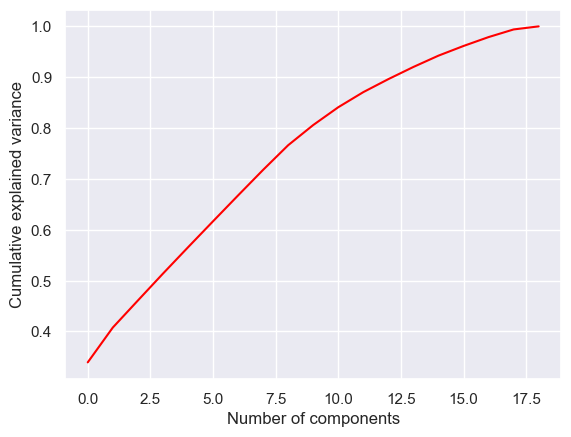

In [162]:
#Krzywa określa ilościowo, jaka część całkowitej, -wymiarowej wariancji,
                                     # jest zawarta w pierwszych N składnikach.
pca = PCA().fit(standane)
plt.plot(np.cumsum(pca.explained_variance_ratio_),c='red')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# Na przykład widzimy, że w przypadku pierwszych  składowych zawarte jest około % wariancji,
# podczas gdy potrzeba około  składowych, aby opisać blisko 100% wariancji.

In [163]:
#%%Redukcja ilości własności metodą PCA 
# W celu wykonania analizy głównych składowych można wykorzystać funkcję PCA z pakietu sklearn.decomposition
# Ja robię redukcję ilości własności metodą PCA dla składowych 13
pca = PCA(n_components=13)

# kolumna do wykluczenia (ta na której nie chcemy PCA )
exclude_filter = ~standane.columns.isin(['Credit_Score']) 

principal_components = pca.fit_transform(standane.loc[:, exclude_filter]) # przeliczenie

#Sprawdzamy wyniki tworząc nowy data frame:
standane_new = pd.DataFrame(data = principal_components, 
                           columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13']) 

standane_new['Credit_Score'] = standane['Credit_Score']
standane_new.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,Credit_Score
0,-1.486793,-2.254746,0.033570,-2.018902,-1.828794,0.341242,0.265160,-0.696194,0.908948,0.134809,-0.013243,0.016475,-0.133733,2
1,-1.838583,-2.691126,0.041347,-1.924929,-1.856339,0.352098,0.240739,-0.632978,0.878630,-0.104140,0.946893,0.008180,-0.732822,2
2,-1.968765,-2.558224,0.033771,-1.981521,-1.824107,0.351601,0.258424,-0.680768,0.897349,0.311005,0.374156,0.043852,-0.076575,2
3,-1.947043,-2.540513,0.032624,-1.982984,-1.822525,0.352163,0.260833,-0.680829,0.898216,0.332418,0.354803,0.073841,-0.064912,2
4,-1.903599,-2.505092,0.030332,-1.985909,-1.819360,0.353288,0.265650,-0.680950,0.899950,0.375244,0.316096,0.133818,-0.041586,2
5,-2.012209,-2.593645,0.036063,-1.978595,-1.827272,0.350476,0.253607,-0.680646,0.895616,0.268178,0.412863,-0.016125,-0.099902,2
6,-1.751695,-2.620283,0.036761,-1.930780,-1.850010,0.354348,0.250374,-0.633221,0.882097,-0.018487,0.869480,0.128134,-0.686169,1
7,-3.618040,-0.323234,0.005035,-1.123319,-0.794166,-0.519654,-0.450842,0.005758,-1.310166,0.146393,0.554072,0.066218,0.277936,1
8,-3.531152,-0.252391,0.000450,-1.129170,-0.787837,-0.517404,-0.441207,0.005515,-1.306699,0.232046,0.476658,0.186172,0.324589,2
9,-3.618040,-0.323234,0.005035,-1.123319,-0.794166,-0.519654,-0.450842,0.005758,-1.310166,0.146393,0.554072,0.066218,0.277936,2


# Klasyfikacja


# 1) kNN - dla mniej przetworzonych danych

In [164]:
dane['Credit_Score'] = Credit_Score_num
(train_set, test_set) = train_test_split(dane.values, train_size=0.7,random_state=13) 
#Generujemy zestaw uczący - do trenowania, który stanowi 70% naszych danych.
#Następnie użyjemy pozostałych danych do testowania - 30%.

train_inputs = train_set[:, 0:18] 
train_classes = train_set[:, 18] 
test_inputs = test_set[:, 0:18] 
test_classes = test_set[:, 18]

* kNN k = 4

Accuracy: 0.7639008753544569


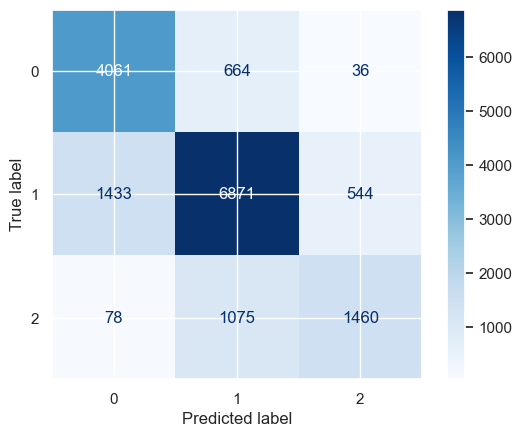

In [165]:
knn = KNeighborsClassifier(n_neighbors = 4, metric='euclidean')
knn.fit(train_inputs, train_classes)

y_pred = knn.predict(test_inputs)

print("Accuracy:" , accuracy_score(test_classes, y_pred))


confusion_matrix = metrics.confusion_matrix(test_classes, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Blues,values_format='g')

* kNN k = 6

Accuracy: 0.7452225372950314


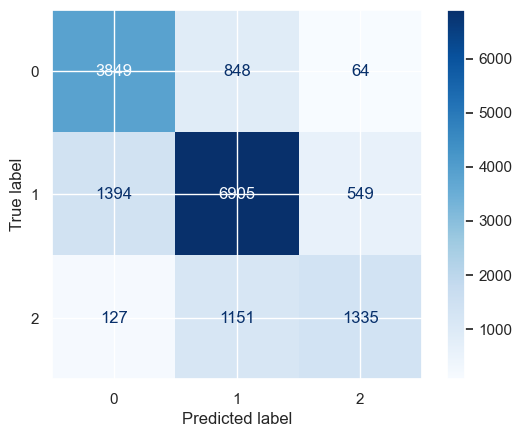

In [166]:
knn = KNeighborsClassifier(n_neighbors = 6, metric='euclidean')
knn.fit(train_inputs, train_classes)

y_pred = knn.predict(test_inputs)

print("Accuracy:" , accuracy_score(test_classes, y_pred))

confusion_matrix = metrics.confusion_matrix(test_classes, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Blues,values_format='g')

* kNN k = 10

Accuracy: 0.7186536801873998


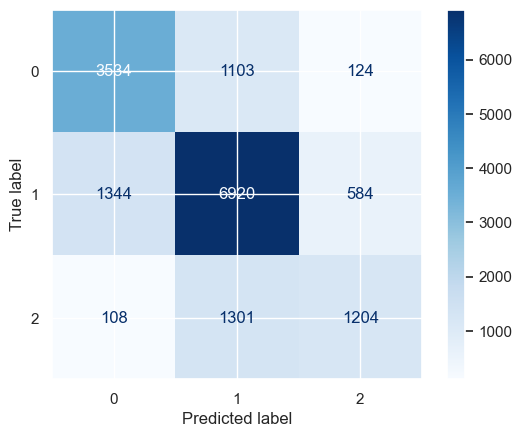

In [167]:
knn = KNeighborsClassifier(n_neighbors = 10, metric='euclidean')
knn.fit(train_inputs, train_classes)

y_pred = knn.predict(test_inputs)
print("Accuracy:" , accuracy_score(test_classes, y_pred))

confusion_matrix = metrics.confusion_matrix(test_classes, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Blues,values_format='g')

# 1) kNN - dla bardziej przetworzonych danych

In [168]:
(train_set1, test_set1) = train_test_split(standane_new.values, train_size=0.7,random_state=13) 
#Generujemy zestaw uczący - do trenowania, który stanowi 70% naszych danych.
#Następnie użyjemy pozostałych danych do testowania - 30%.

train_inputs1 = train_set1[:, 0:13] 
train_classes1 = train_set1[:, 13] 
test_inputs1 = test_set1[:, 0:13] 
test_classes1 = test_set1[:, 13]

* kNN k = 4

Accuracy: 0.7439896436937492


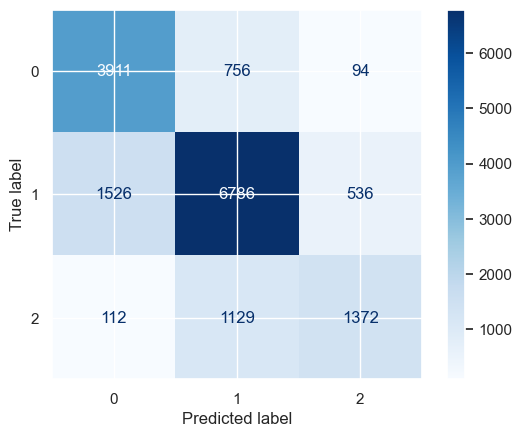

In [169]:
knn = KNeighborsClassifier(n_neighbors = 4, metric='euclidean')
knn.fit(train_inputs1, train_classes1)
y_pred1 = knn.predict(test_inputs1)
print("Accuracy:" , accuracy_score(test_classes1, y_pred1))

confusion_matrix = metrics.confusion_matrix(test_classes1, y_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Blues,values_format='g')

* kNN k = 6

Accuracy: 0.7337566268031069


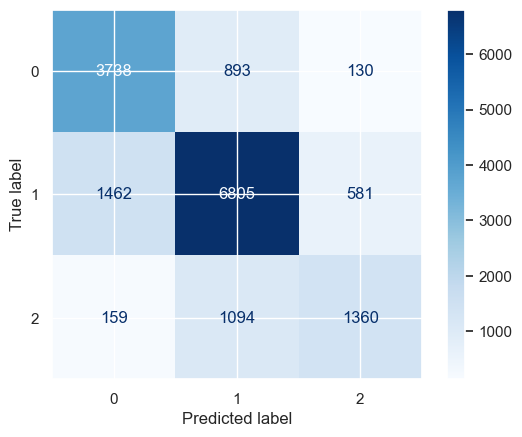

In [170]:
knn = KNeighborsClassifier(n_neighbors = 6, metric='euclidean')
knn.fit(train_inputs1, train_classes1)
y_pred1 = knn.predict(test_inputs1)
print("Accuracy:" , accuracy_score(test_classes1, y_pred1))

confusion_matrix = metrics.confusion_matrix(test_classes1, y_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Blues,values_format='g')

* kNN k = 10

Accuracy: 0.7145234866231044


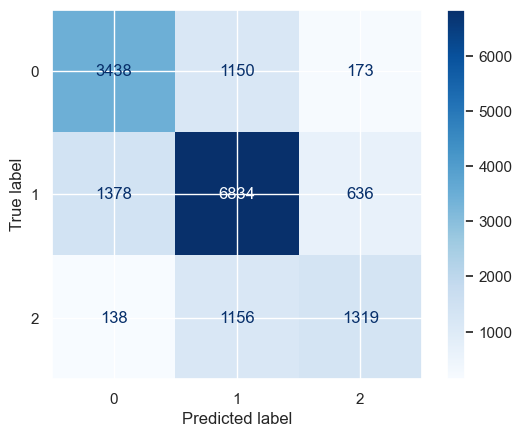

In [171]:
knn = KNeighborsClassifier(n_neighbors = 10, metric='euclidean')
knn.fit(train_inputs1, train_classes1)
y_pred1 = knn.predict(test_inputs1)
print("Accuracy:" , accuracy_score(test_classes1, y_pred1))

confusion_matrix = metrics.confusion_matrix(test_classes1, y_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Blues,values_format='g')

# 2) Naive Bayes - dla mniej przetworzonych danych

Accuracy: 0.6485636789545062


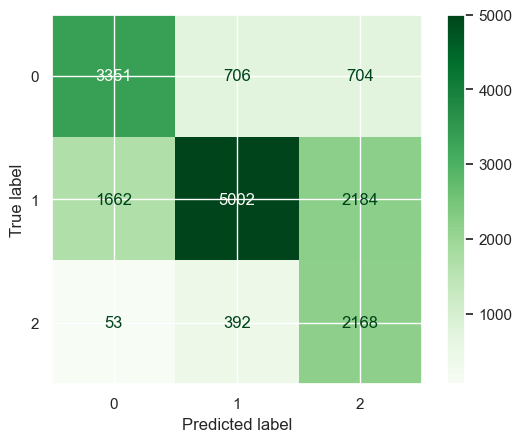

In [172]:
model = GaussianNB()
model.fit(train_inputs,train_classes)
y_pred = model.predict(test_inputs)
accuray = accuracy_score(y_pred, test_classes)
print("Accuracy:", accuray)

confusion_matrix = metrics.confusion_matrix(test_classes, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Greens,values_format='g')

# 2) Naive Bayes - dla bardziej przetworzonych danych

Accuracy: 0.6502897299963013


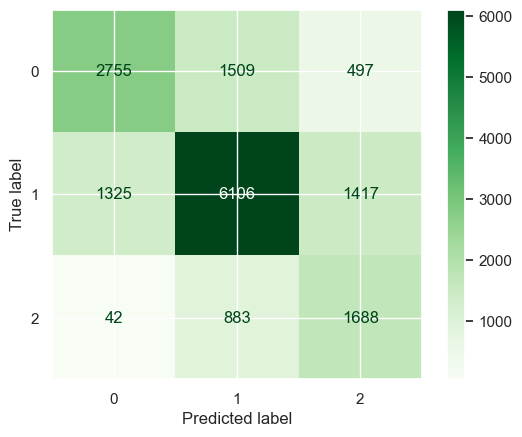

In [173]:
model = GaussianNB()
model.fit(train_inputs1,train_classes1)
y_pred1 = model.predict(test_inputs1)
accuray = accuracy_score(y_pred1, test_classes1)
print("Accuracy:", accuray)

confusion_matrix = metrics.confusion_matrix(test_classes1, y_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Greens,values_format='g')

# 3) Drzewo decyzyjne - wersja mniejsza - dla mniej przetworzonych danych

In [174]:
dtc = tree.DecisionTreeClassifier(max_depth = 2, criterion = 'entropy')
dtc = dtc.fit(train_inputs, train_classes)

y_pred = dtc.predict(test_inputs)

print("Accuracy:" , accuracy_score(test_classes, y_pred))

Accuracy: 0.669091357415855


In [175]:
kolumny = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Auto_Loan', 'Credit_Builder_Loan', 'Personal_Loan',
       'Home_Enquity_Loan', 'Mortgage_Loan', 'Student_Loan',
       'Debt_Consolidation_Loan', 'Payday_Loan']

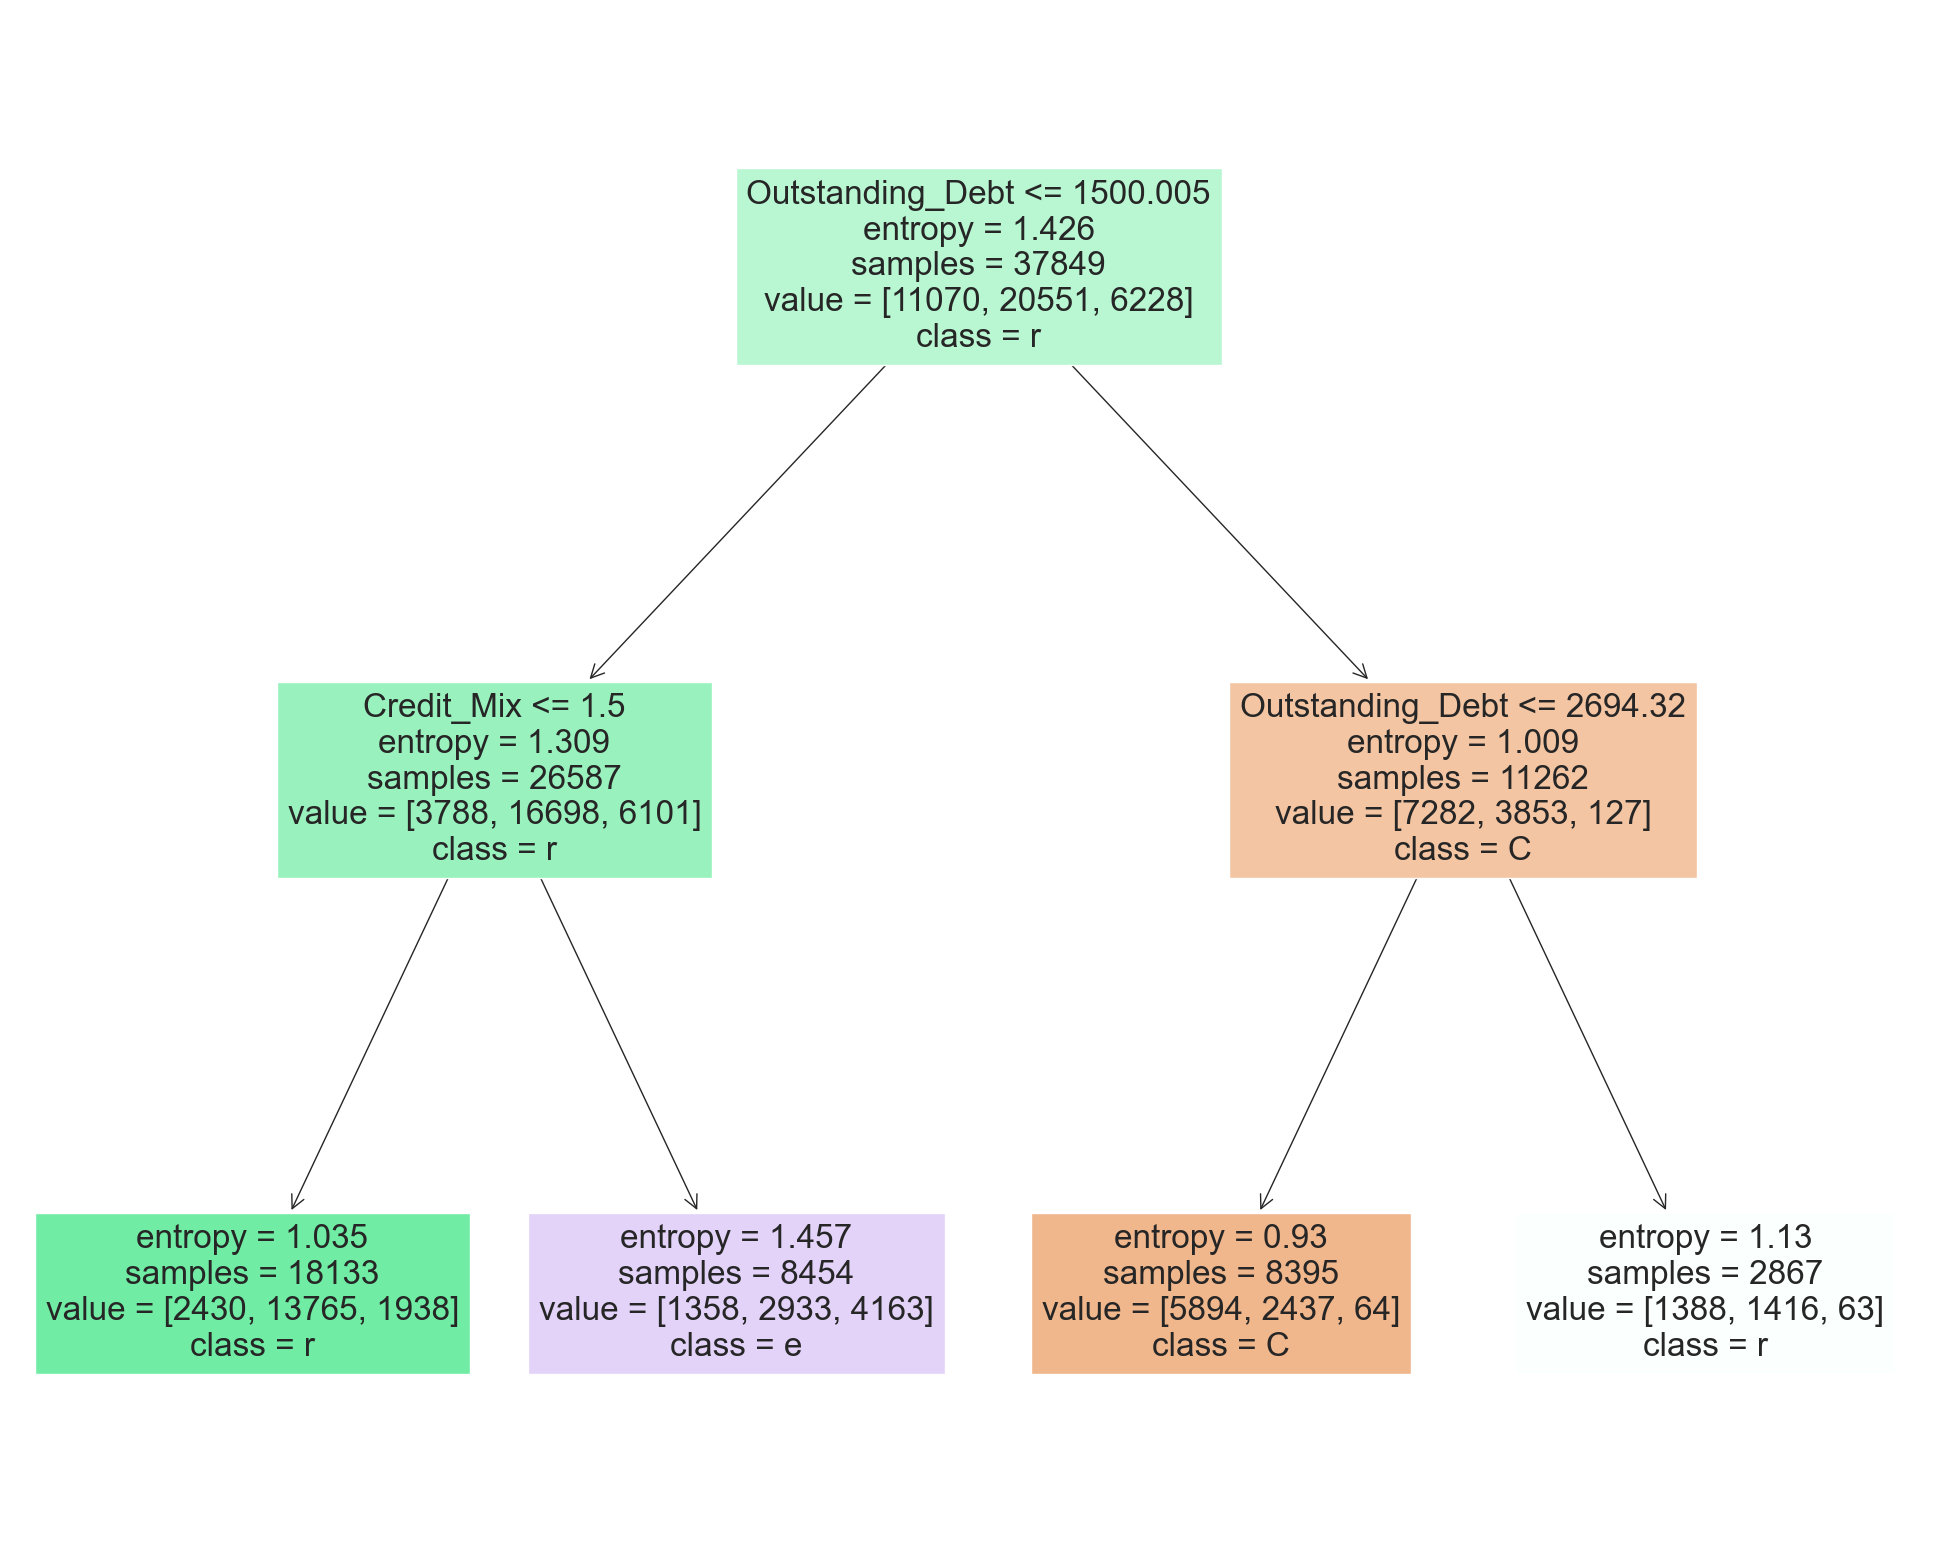

In [176]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=kolumny,  
                   class_names='Credit_Score',
                   filled=True)

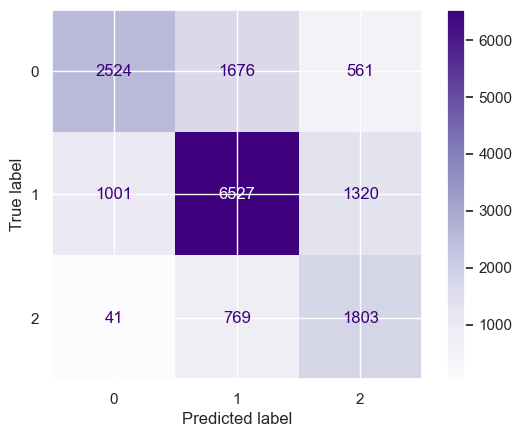

In [177]:
confusion_matrix = metrics.confusion_matrix(test_classes, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Purples,values_format='g')

# 3) Drzewo decyzyjne - wersja większa - dla mniej przetworzonych danych

Accuracy: 0.7446677351744544


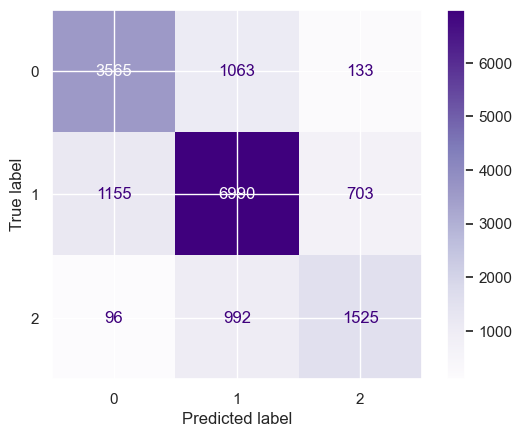

In [178]:
dtc = tree.DecisionTreeClassifier(max_depth = 15, criterion = 'entropy')
dtc = dtc.fit(train_inputs, train_classes)

y_pred = dtc.predict(test_inputs)

print("Accuracy:" , accuracy_score(test_classes, y_pred))

confusion_matrix = metrics.confusion_matrix(test_classes, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Purples,values_format='g')

# 3) Drzewo decyzyjne - wersja mniejsza - dla bardziej przetworzonych danych

In [179]:
dtc = tree.DecisionTreeClassifier(max_depth = 2, criterion = 'entropy')
dtc = dtc.fit(train_inputs1, train_classes1)

y_pred1 = dtc.predict(test_inputs1)

print("Accuracy:" , accuracy_score(test_classes1, y_pred1))

Accuracy: 0.6424608556281592


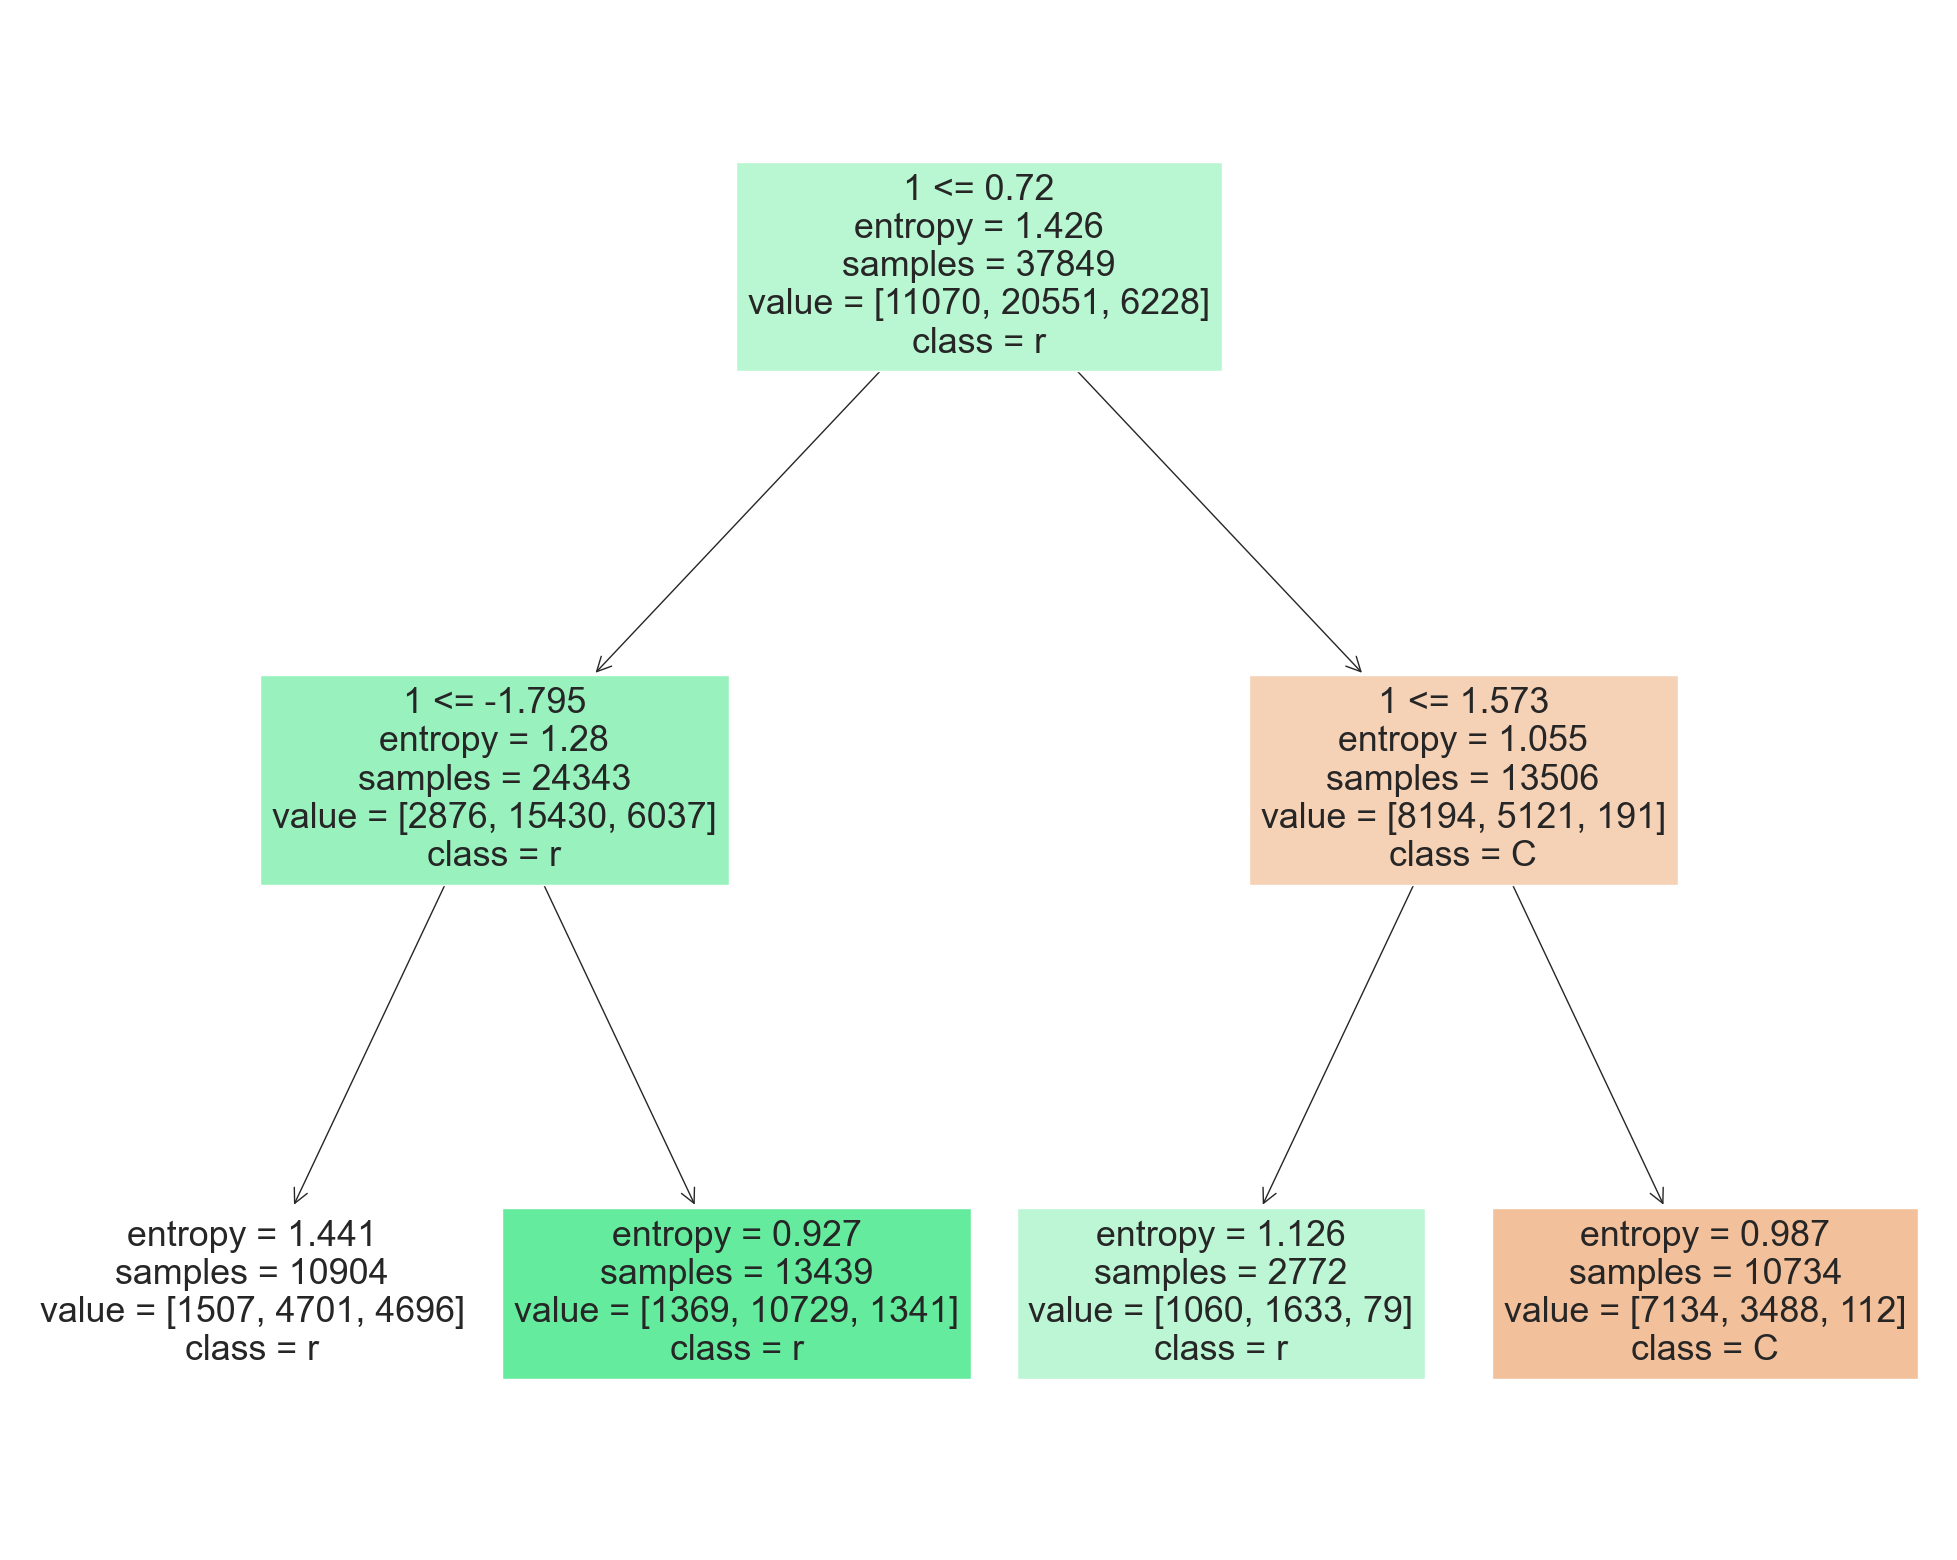

In [180]:
kolumny = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=kolumny,  
                   class_names='Credit_Score',
                   filled=True)

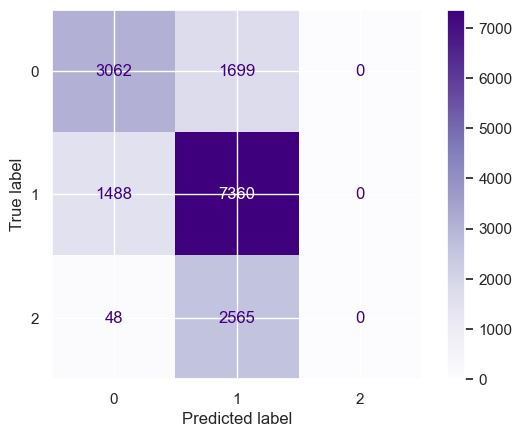

In [181]:
confusion_matrix = metrics.confusion_matrix(test_classes1, y_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Purples,values_format='g')

# 3) Drzewo decyzyjne - wersja większa - dla bardziej przetworzonych danych

Accuracy: 0.7016397484897053


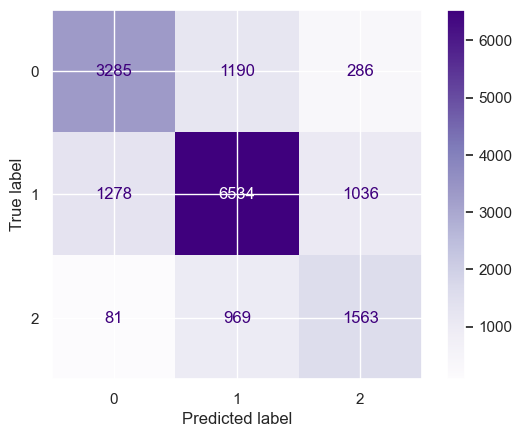

In [182]:
dtc = tree.DecisionTreeClassifier(max_depth = 12, criterion = 'entropy')
dtc = dtc.fit(train_inputs1, train_classes1)

y_pred1 = dtc.predict(test_inputs1)

print("Accuracy:" , accuracy_score(test_classes1, y_pred1))

confusion_matrix = metrics.confusion_matrix(test_classes1, y_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Purples,values_format='g')

# 4) Sieci neuronowe - dla mniej przetworzonych danych

Sieć neuronowa z jedną warstwą ukrytą

0.689742325237332


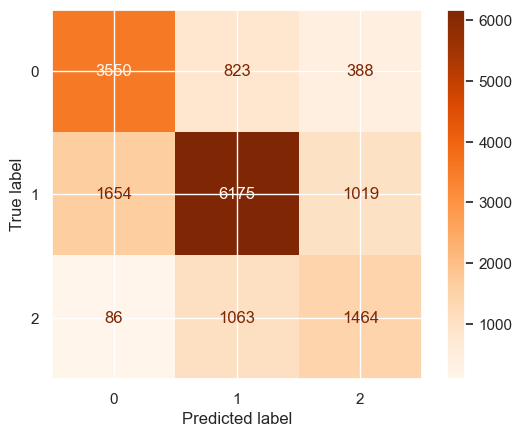

In [183]:
mlp = MLPClassifier(hidden_layer_sizes=(2), max_iter=10000)
mlp.fit(train_inputs, train_classes)

predictions_test = mlp.predict(test_inputs)
print(accuracy_score(predictions_test, test_classes))

confusion_matrix = metrics.confusion_matrix(test_classes,predictions_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Oranges,values_format='g')

Sieć neuronowa z funkcją aktywacji Tanh

In [184]:
model = Sequential()
model.add(Dense(17, activation='tanh'))
model.add(Dense(14,activation = 'tanh'))
model.add(Dense(11,activation = 'tanh'))
model.add(Dense(8,activation = 'tanh'))
model.add(Dense(5,activation = 'tanh'))
model.add(Dense(3,activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

sgd = SGD(learning_rate = 0.001, momentum = 0.8)
model.compile(optimizer = sgd, loss = 'binary_crossentropy')

In [102]:
model.fit(train_inputs, train_classes,epochs = 100)

Epoch 1/100
1183/1183 [==============================] - 3s 2ms/step - loss: 0.3963
Epoch 2/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3839
Epoch 3/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3833
Epoch 4/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3829
Epoch 5/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3826
Epoch 6/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3823
Epoch 7/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3819
Epoch 8/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3814
Epoch 9/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3806
Epoch 10/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3822
Epoch 11/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3819
Epoch 12/100
1183/1183 [==============================] - 2s 2ms/step - lo

Accuracy: 0.5454321292072494


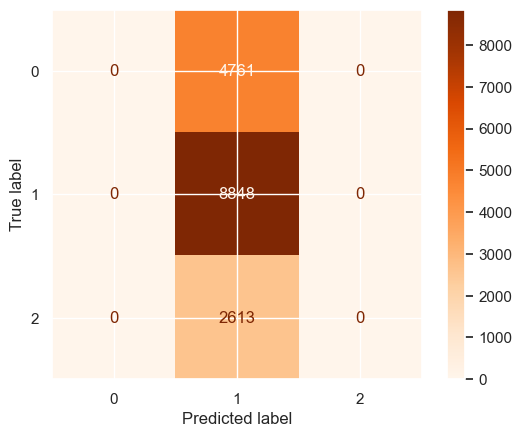

In [103]:
predictions = model.predict(test_inputs)
print('Accuracy:', accuracy_score(np.round(abs(predictions)),test_classes))

confusion_matrix = metrics.confusion_matrix(test_classes,np.round(abs(predictions)))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Oranges,values_format='g')

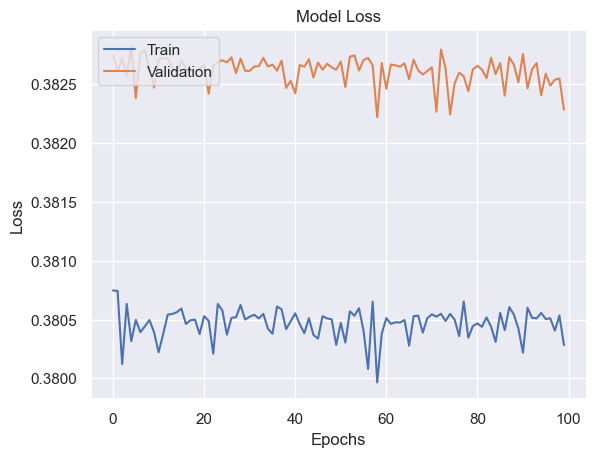

In [105]:
history = model.fit(train_inputs,train_classes,epochs = 100,batch_size = 8,verbose = 0,validation_split = 0.3) 
hist_1 = model.fit(test_inputs,test_classes,epochs = 100,batch_size = 8,verbose = 0,validation_split = 0.3) 

plt.plot(history.history['loss'], label='Train')
plt.plot(hist_1.history['loss'], label='Validation')
 
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
plt.legend(loc='upper left')
plt.show()

Sieć neuronowa z funkcją aktywacji Softmax, alg. optymalizacji Adam

In [106]:
model = Sequential()
model.add(Dense(17, activation='softmax'))
model.add(Dense(14,activation = 'softmax'))
model.add(Dense(11,activation = 'softmax'))
model.add(Dense(8,activation = 'softmax'))
model.add(Dense(5,activation = 'softmax'))
model.add(Dense(3,activation = 'softmax'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy')

In [107]:
model.fit(train_inputs, train_classes,epochs = 100)

Epoch 1/100
1183/1183 [==============================] - 3s 2ms/step - loss: 0.4115
Epoch 2/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3825
Epoch 3/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3825
Epoch 4/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3825
Epoch 5/100
1183/1183 [==============================] - 3s 2ms/step - loss: 0.3826
Epoch 6/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3826
Epoch 7/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3826
Epoch 8/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3826
Epoch 9/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3825
Epoch 10/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3826
Epoch 11/100
1183/1183 [==============================] - 2s 2ms/step - loss: 0.3826
Epoch 12/100
1183/1183 [==============================] - 2s 2ms/step - lo

Accuracy: 0.5454321292072494


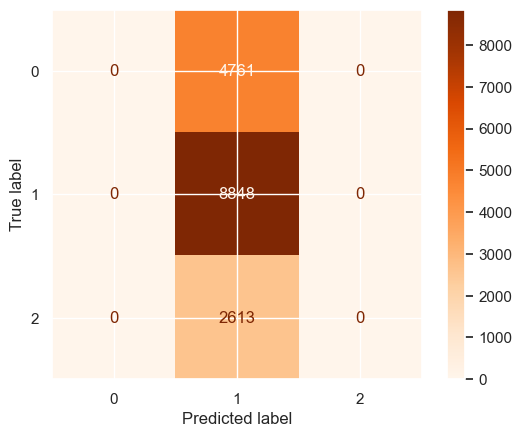

In [108]:
predictions = model.predict(test_inputs)
print('Accuracy:', accuracy_score(np.round(abs(predictions)),test_classes))

confusion_matrix = metrics.confusion_matrix(test_classes,np.round(abs(predictions)))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Oranges,values_format='g')

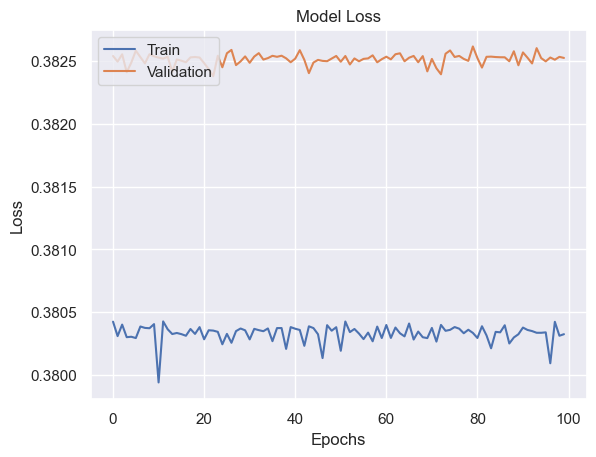

In [109]:
history = model.fit(train_inputs,train_classes,epochs = 100,batch_size = 8,verbose = 0,validation_split = 0.3) 
hist_1 = model.fit(test_inputs,test_classes,epochs = 100,batch_size = 8,verbose = 0,validation_split = 0.3) 

plt.plot(history.history['loss'], label='Train')
plt.plot(hist_1.history['loss'], label='Validation')
 
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
plt.legend(loc='upper left')
plt.show()

# 4) Sieci neuronowe - dla bardziej przetworzonych danych

Sieć neuronowa z jedną warstwą ukrytą

0.674701023301689


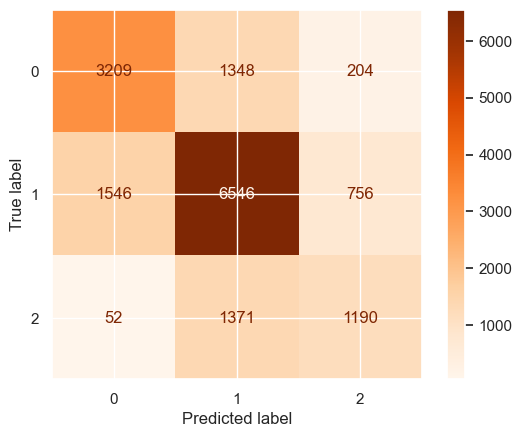

In [110]:
mlp = MLPClassifier(hidden_layer_sizes=(2), max_iter=10000)
mlp.fit(train_inputs1, train_classes1)

predictions_test1 = mlp.predict(test_inputs1)
print(accuracy_score(predictions_test1, test_classes1))

confusion_matrix = metrics.confusion_matrix(test_classes1,predictions_test1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Oranges,values_format='g')

Sieć neuronowa z funkcją aktywacji Tanh

In [111]:
model = Sequential()
model.add(Dense(12, activation='tanh'))
model.add(Dense(10,activation = 'tanh'))
model.add(Dense(8,activation = 'tanh'))
model.add(Dense(6,activation = 'tanh'))
model.add(Dense(4,activation = 'tanh'))
model.add(Dense(2,activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

sgd = SGD(learning_rate = 0.001, momentum = 0.8)
model.compile(optimizer = sgd, loss = 'binary_crossentropy')

In [112]:
model.fit(train_inputs1, train_classes1,epochs = 100)

Epoch 1/100
1183/1183 [==============================] - 3s 2ms/step - loss: 0.1052
Epoch 2/100
1183/1183 [==============================] - 3s 2ms/step - loss: -0.1761
Epoch 3/100
1183/1183 [==============================] - 3s 2ms/step - loss: -0.3485
Epoch 4/100
1183/1183 [==============================] - 2s 2ms/step - loss: -0.5100
Epoch 5/100
1183/1183 [==============================] - 2s 2ms/step - loss: -0.6685
Epoch 6/100
1183/1183 [==============================] - 2s 2ms/step - loss: -0.8275
Epoch 7/100
1183/1183 [==============================] - 2s 2ms/step - loss: -0.9871
Epoch 8/100
1183/1183 [==============================] - 2s 2ms/step - loss: -1.1477
Epoch 9/100
1183/1183 [==============================] - 2s 2ms/step - loss: -1.3102
Epoch 10/100
1183/1183 [==============================] - 2s 2ms/step - loss: -1.4756
Epoch 11/100
1183/1183 [==============================] - 2s 2ms/step - loss: -1.6404
Epoch 12/100
1183/1183 [==============================] - 2s 2ms

Epoch 96/100
1183/1183 [==============================] - 2s 2ms/step - loss: -15.6336
Epoch 97/100
1183/1183 [==============================] - 2s 2ms/step - loss: -15.8344
Epoch 98/100
1183/1183 [==============================] - 2s 2ms/step - loss: -16.0411
Epoch 99/100
1183/1183 [==============================] - 2s 2ms/step - loss: -16.2365
Epoch 100/100
1183/1183 [==============================] - 2s 2ms/step - loss: -16.2520


Accuracy: 0.5456170632474417


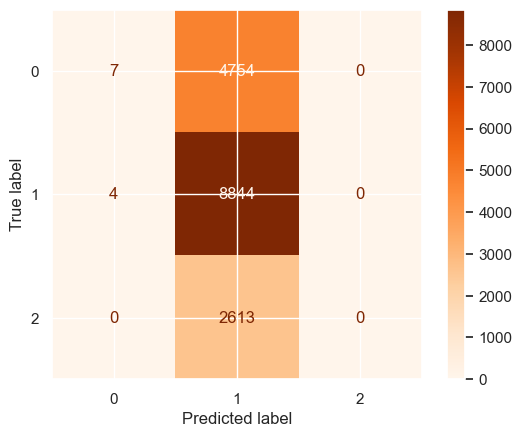

In [113]:
predictions = model.predict(test_inputs1)
print('Accuracy:', accuracy_score(np.round(abs(predictions)),test_classes1))

confusion_matrix = metrics.confusion_matrix(test_classes1,np.round(abs(predictions)))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Oranges,values_format='g')

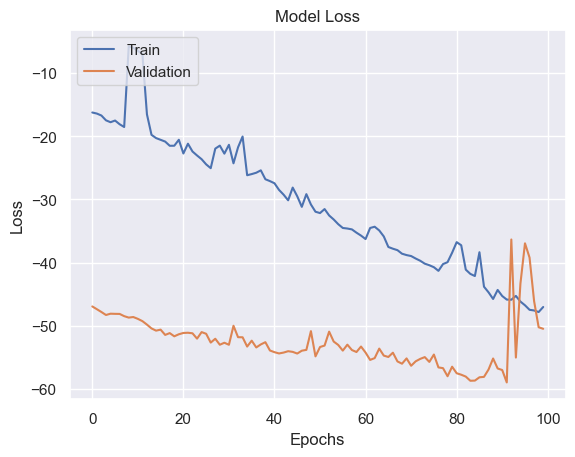

In [114]:
history = model.fit(train_inputs1,train_classes1,epochs = 100,batch_size = 8,verbose = 0,validation_split = 0.3) 
hist_1 = model.fit(test_inputs1,test_classes1,epochs = 100,batch_size = 8,verbose = 0,validation_split = 0.3) 

plt.plot(history.history['loss'], label='Train')
plt.plot(hist_1.history['loss'], label='Validation')
 
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
plt.legend(loc='upper left')
plt.show()

Sieć neuronowa z funkcją aktywacji Softmax, alg. optymalizacji Adam

In [115]:
model = Sequential()
model.add(Dense(12, activation='softmax'))
model.add(Dense(10,activation = 'softmax'))
model.add(Dense(8,activation = 'softmax'))
model.add(Dense(6,activation = 'softmax'))
model.add(Dense(4,activation = 'softmax'))
model.add(Dense(2,activation = 'softmax'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy')

In [116]:
model.fit(train_inputs1, train_classes1,epochs = 100)

Epoch 1/100
1183/1183 [==============================] - 3s 2ms/step - loss: 0.4020
Epoch 2/100
1183/1183 [==============================] - 3s 2ms/step - loss: 0.1259
Epoch 3/100
1183/1183 [==============================] - 2s 2ms/step - loss: -0.0931
Epoch 4/100
1183/1183 [==============================] - 2s 2ms/step - loss: -0.2368
Epoch 5/100
1183/1183 [==============================] - 3s 2ms/step - loss: -0.3732
Epoch 6/100
1183/1183 [==============================] - 3s 2ms/step - loss: -0.5064
Epoch 7/100
1183/1183 [==============================] - 3s 2ms/step - loss: -0.6436
Epoch 8/100
1183/1183 [==============================] - 3s 2ms/step - loss: -0.7800
Epoch 9/100
1183/1183 [==============================] - 3s 2ms/step - loss: -0.9184
Epoch 10/100
1183/1183 [==============================] - 3s 2ms/step - loss: -1.0548
Epoch 11/100
1183/1183 [==============================] - 3s 2ms/step - loss: -1.1947
Epoch 12/100
1183/1183 [==============================] - 3s 2ms/

1183/1183 [==============================] - 2s 2ms/step - loss: -14.0713
Epoch 97/100
1183/1183 [==============================] - 2s 2ms/step - loss: -14.2346
Epoch 98/100
1183/1183 [==============================] - 2s 2ms/step - loss: -14.3628
Epoch 99/100
1183/1183 [==============================] - 2s 2ms/step - loss: -14.5128
Epoch 100/100
1183/1183 [==============================] - 2s 2ms/step - loss: -14.6805


Accuracy: 0.6508445321168783


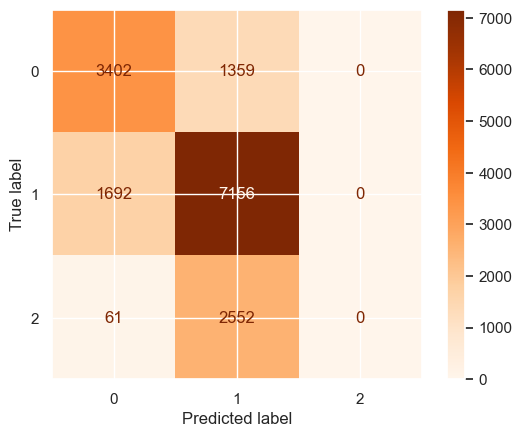

In [117]:
predictions = model.predict(test_inputs1)
print('Accuracy:', accuracy_score(np.round(abs(predictions)),test_classes1))

confusion_matrix = metrics.confusion_matrix(test_classes1,np.round(abs(predictions)))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display = cm_display.plot(cmap=plt.cm.Oranges,values_format='g')

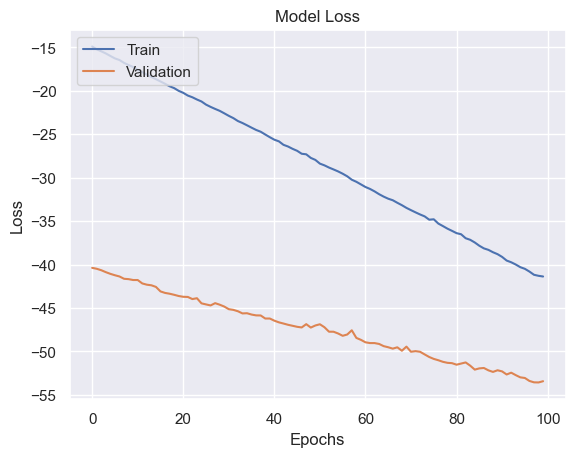

In [118]:
history = model.fit(train_inputs1,train_classes1,epochs = 100,batch_size = 8,verbose = 0,validation_split = 0.3) 
hist_1 = model.fit(test_inputs1,test_classes1,epochs = 100,batch_size = 8,verbose = 0,validation_split = 0.3) 

plt.plot(history.history['loss'], label='Train')
plt.plot(hist_1.history['loss'], label='Validation')
 
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
plt.legend(loc='upper left')
plt.show()